In [20]:
# !pip install git+https://github.com/Koziev/rusyllab

In [21]:
import rusyllab

from os import listdir
import math as mt
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

import pickle
import numpy as np

In [22]:
def calc_menzerat_for_wlen_slogs(texts):
    x = []
    wlen2sloglen = dict()

    for text in tqdm(texts):
        for word in text.split():
            slogs = rusyllab.split_word(word)
            wlen = len(slogs)
    #         x.append(wlen)
            if wlen not in wlen2sloglen:
                wlen2sloglen[wlen] = []
            for s in slogs:
                wlen2sloglen[wlen].append(len(str.strip(s)))
    x = np.array(list(wlen2sloglen.keys()))
    x.sort()
    y = np.array([np.array(wlen2sloglen[wlen]).mean() for wlen in x])
    
    return x, y

In [23]:
def plot_menzerat_law(data, titles, cutoff=30):
    assert len(data) == len(titles)

    n_cols = max(mt.floor(mt.sqrt(len(data))), 1)
    n_rows = max(mt.ceil(len(data) / n_cols), 1)
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,10))
    fig.tight_layout(h_pad = 2, w_pad = 3)

    if n_cols == 1 or n_cols == 1:
        axs = [axs]
        if n_cols == 1 and n_cols == 1:
          axs = [axs]

    for i in range(len(data)):
        col = i%n_cols
        row = (int(i/n_cols)%max(n_rows,n_cols))
        x, y = data[i]
        axs[row][col].set_title(titles[i])
        axs[row][col].plot(x[:cutoff], y[:cutoff])

    plt.show()

#Для всего корпуса

In [24]:
texts = [pickle.load(open(f'clean_files/{filename}', 'rb'))['text']\
             for filename in listdir('clean_files')]

In [25]:
x, y = calc_menzerat_for_wlen_slogs(texts)

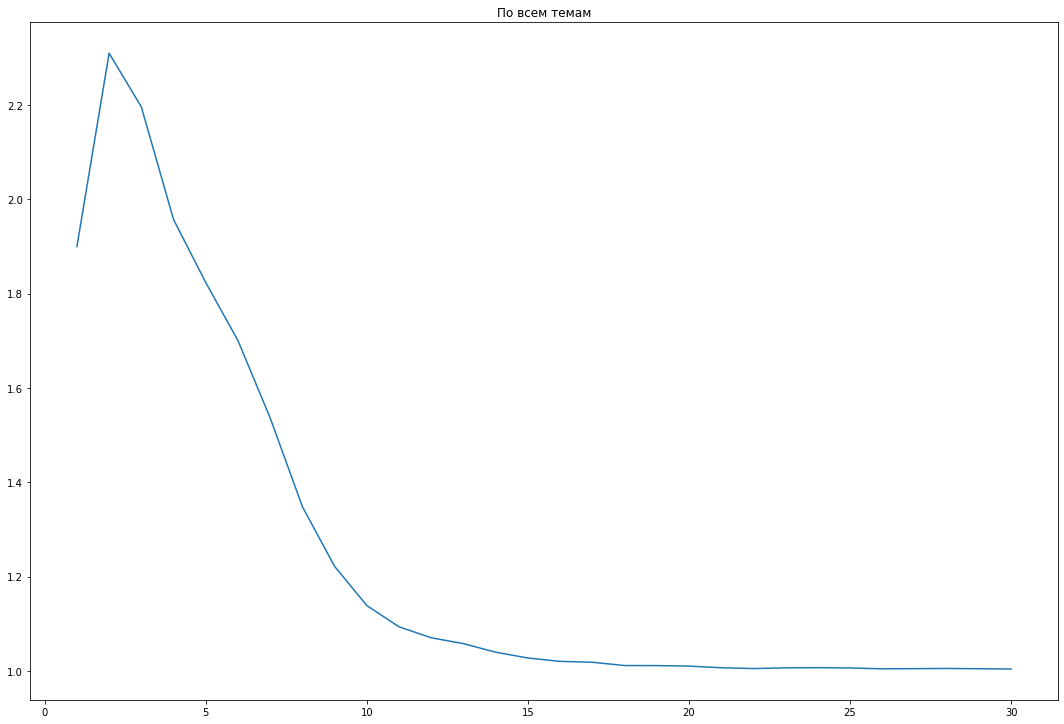

In [26]:
plot_menzerat_law([(x, y)], ["По всем темам"])

#По отдельным темам

In [27]:
data = [pickle.load(open(f'clean_files/{filename}', 'rb')) for filename in listdir('clean_files')]
hubs = ['научно-популярное', 
        'гаджеты', 
        'программирование', 
        'космонавтика', 
        'it-компании']

In [28]:
stats = [calc_menzerat_for_wlen_slogs([text['text'] 
                                       for text in data if hub in [t.lower()
                                               for t in text['hubs'].split()]]) 
         for hub in hubs]

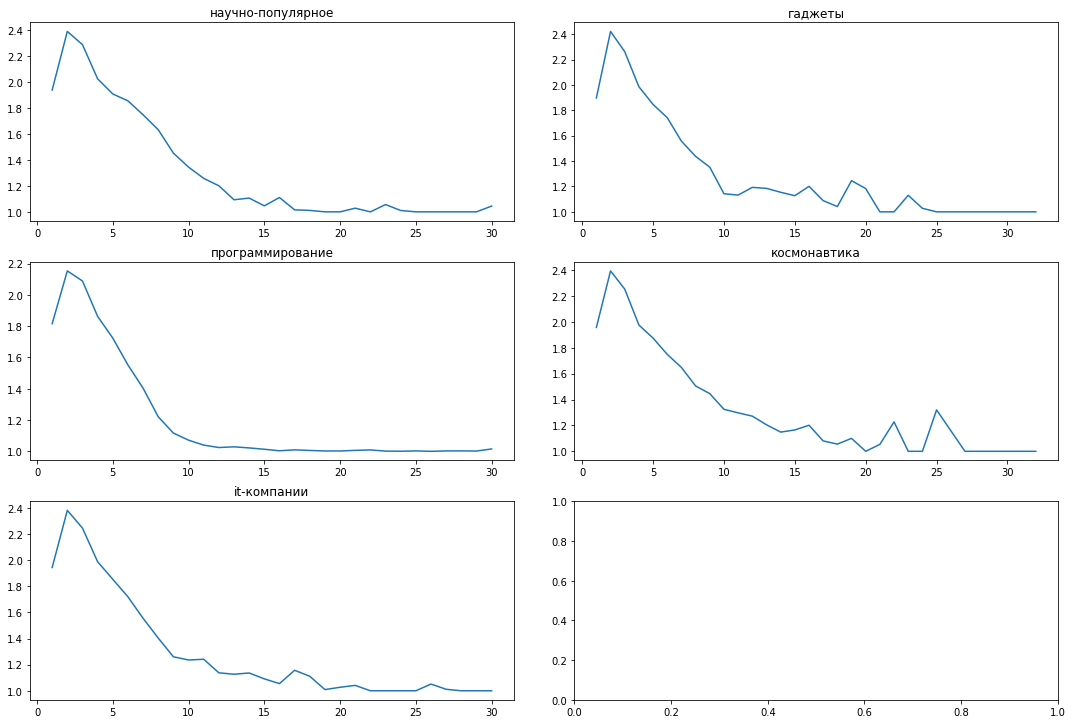

In [29]:
plot_menzerat_law(stats, hubs)